# Magic Gama Telescope
<h3 style="color:lime"> Date: 11-01-2026 </h3>

### Importing libraries

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import RandomOverSampler,SMOTE
  
# fetch dataset 
magic_gamma_telescope = pd.read_csv("./magic_gama_telescope/magic04.data")
 
magic_gamma_telescope.head()


,flength,fWidth,fSize,fConc,fConcl,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


### Description of features and target class

In [2]:
 
variables = pd.read_csv("magic_gama_telescope/variables.csv",index_col="index")
variables

,column,var_type,description
index,,,
1,fLength,continuous,major axis of ellipse [mm]
2,fWidth,continuous,minor axis of ellipse [mm]
3,fSize,continuous,10-log of sum of content of all pixels [in #p...
4,fConc,continuous,ratio of sum of two highest pixels over fSize...
5,fConc1,continuous,ratio of highest pixel over fSize [ratio]
6,fAsym,continuous,distance from highest pixel to center # proje...
7,fM3Long,continuous,3rd root of third moment along major axis [mm]
8,fM3Trans,continuous,3rd root of third moment along minor axis [mm]
9,fAlpha,continuous,angle of major axis with vector to origin [deg]


In [3]:
magic_gamma_telescope['class'] = magic_gamma_telescope['class'].astype('category')
magic_gamma_telescope.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19020 entries, 0 to 19019
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   flength   19020 non-null  float64 
 1   fWidth    19020 non-null  float64 
 2   fSize     19020 non-null  float64 
 3   fConc     19020 non-null  float64 
 4   fConcl    19020 non-null  float64 
 5   fAsym     19020 non-null  float64 
 6   fM3Long   19020 non-null  float64 
 7   fM3Trans  19020 non-null  float64 
 8   fAlpha    19020 non-null  float64 
 9   fDist     19020 non-null  float64 
 10  class     19020 non-null  category
dtypes: category(1), float64(10)
memory usage: 1.5 MB


### Separation of features and target class

In [4]:
X = magic_gamma_telescope.iloc[:,:-1]
y = magic_gamma_telescope.iloc[:,-1]


### encoding the target variable

In [5]:
enc = LabelEncoder()
y = pd.Series(enc.fit_transform(y))
y = y.astype(int)
enc.classes_

array(['g', 'h'], dtype=object)

### correlation of each of the feature with the target variable

In [6]:
corr = X.corrwith(y)
labels = corr.index
column = magic_gamma_telescope.columns[-1]
labels

Index(['flength', 'fWidth', 'fSize', 'fConc', 'fConcl', 'fAsym', 'fM3Long',
       'fM3Trans', 'fAlpha', 'fDist'],
      dtype='object')

### heatmap of correlation

In [7]:
corr = pd.DataFrame(corr.values.reshape((10,1)),index=labels)
corr.columns = [column]
corr = corr.sort_values(by="class")

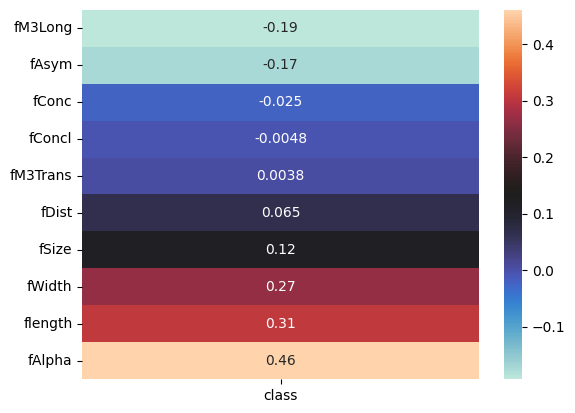

In [8]:
sns.heatmap(corr,cmap=sns.cm.icefire,annot=True)
plt.show()


### class imbalance

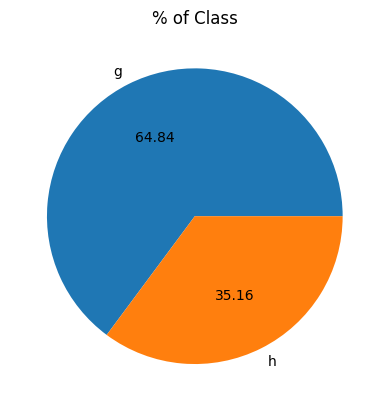

In [9]:
class_proportion = y.value_counts(normalize=True)*100

plt.title("% of Class")
plt.style.use("ggplot")
plt.pie(class_proportion,labels=enc.classes_,autopct=f"%.2f")
plt.show()

> 0 - h <br>
> 1 - g

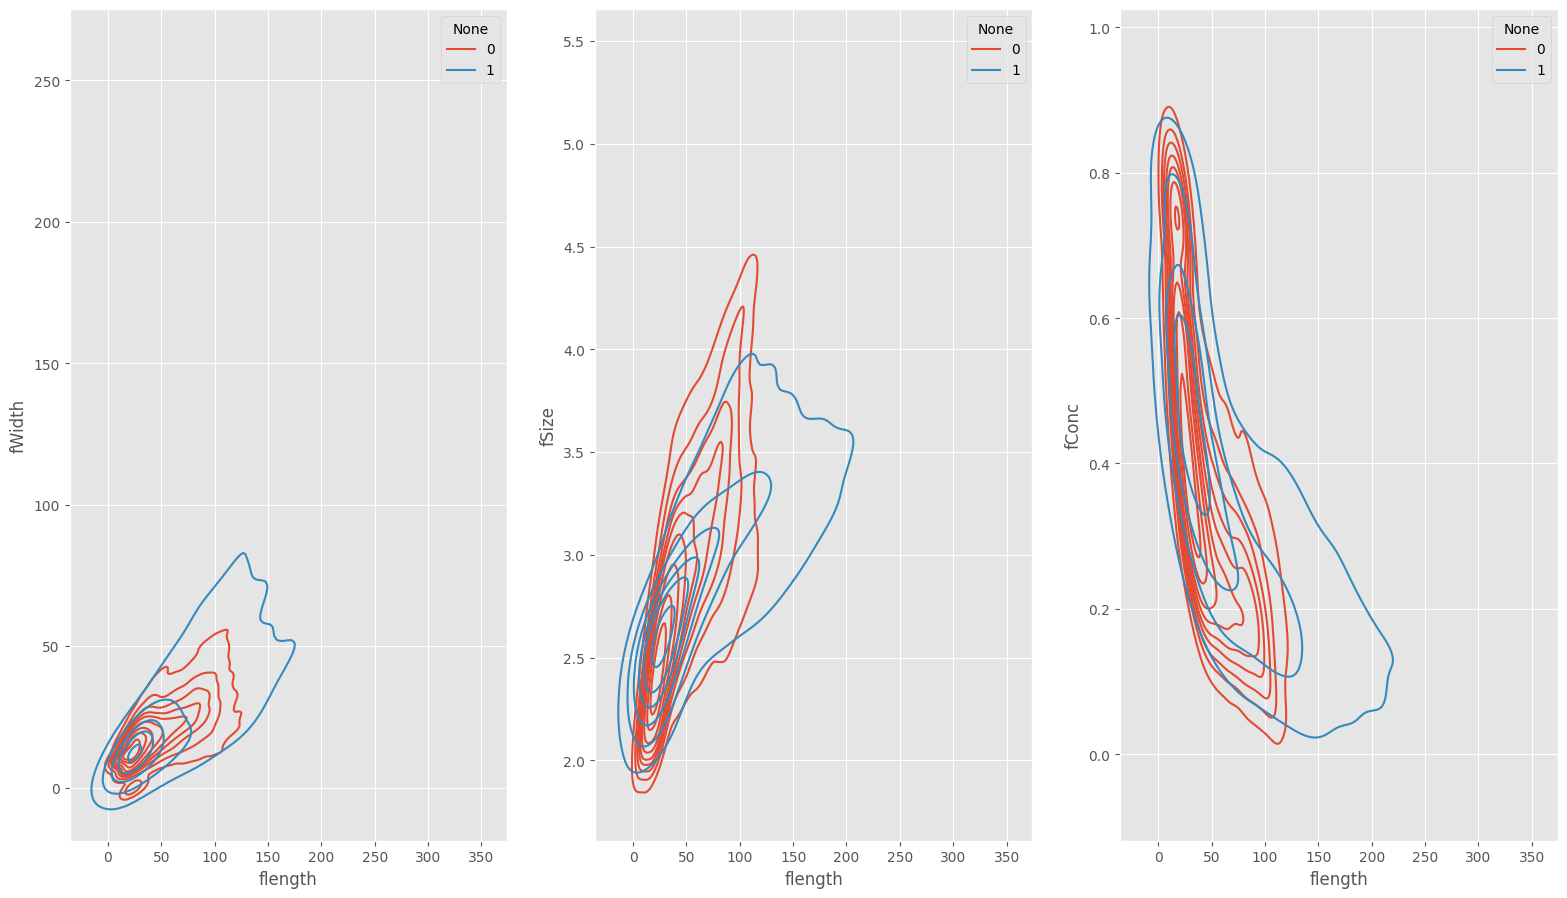

In [10]:
plt.figure(figsize=(19.2,10.8))

plt.subplot(1,3,1)
sns.kdeplot(x=X.iloc[:,0],y=X.iloc[:,1],hue=y)

plt.subplot(1,3,2)
sns.kdeplot(x=X.iloc[:,0],y=X.iloc[:,2],hue=y)

plt.subplot(1,3,3)
sns.kdeplot(x=X.iloc[:,0],y=X.iloc[:,3],hue=y)

plt.show()

### Random Oversampling

In [12]:
sampler = SMOTE()
X,y = sampler.fit_resample(X,y)

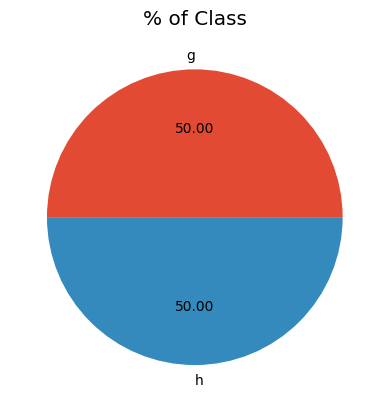

In [13]:
balanced_class = y.value_counts()

plt.title("% of Class")
plt.style.use("ggplot")
plt.pie(balanced_class,labels=enc.classes_,autopct=f"%.2f")
plt.show()

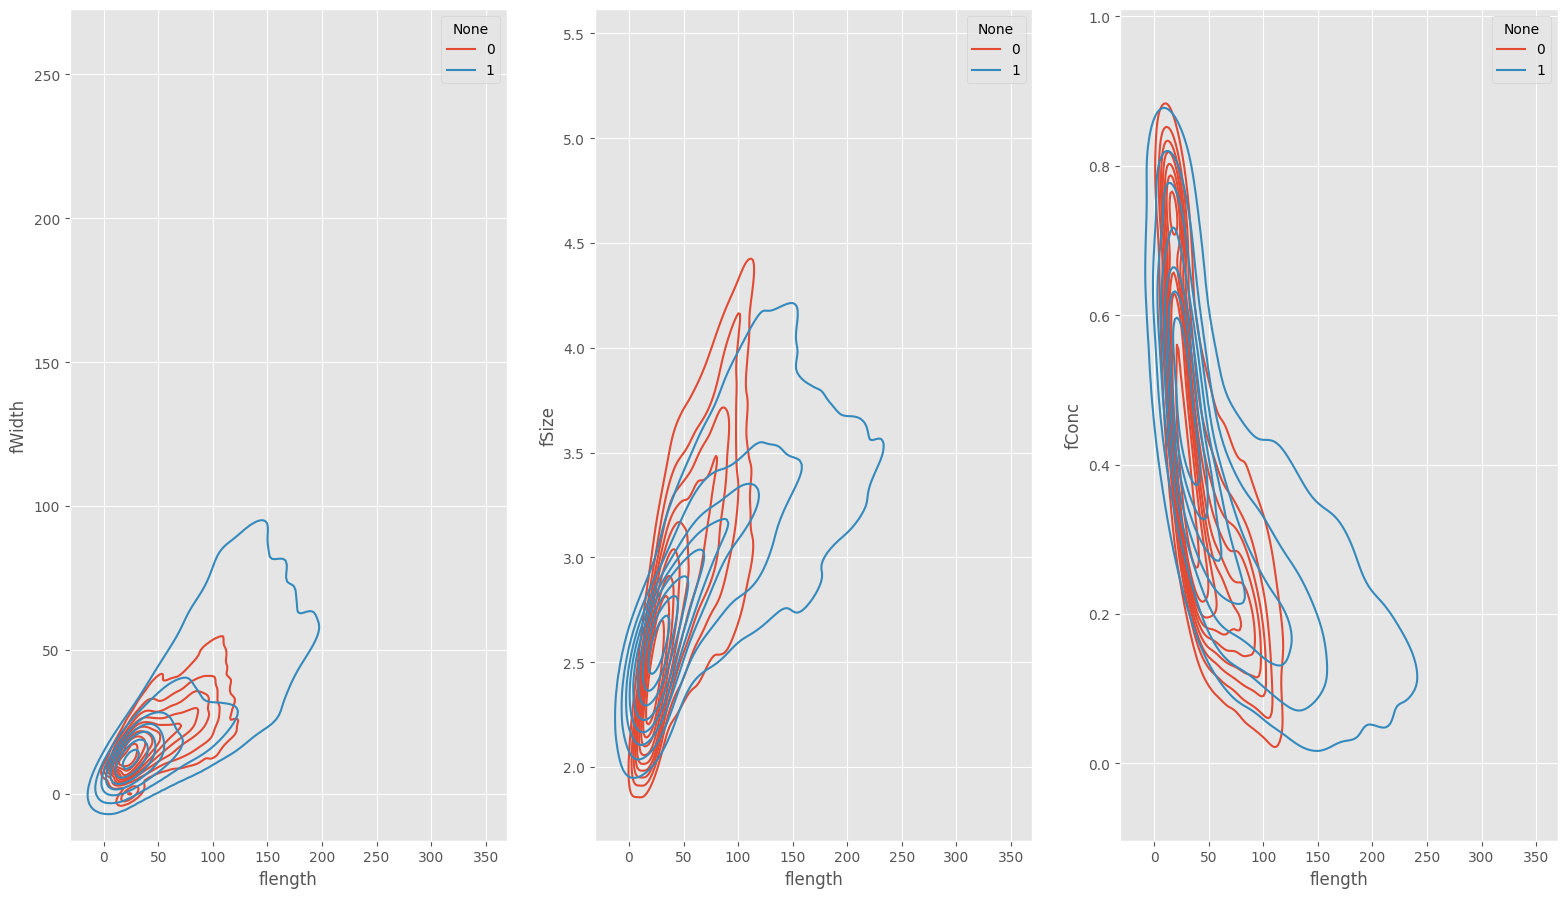

In [15]:
plt.figure(figsize=(19.2,10.8))

plt.subplot(1,3,1)
sns.kdeplot(x=X.iloc[:,0],y=X.iloc[:,1],hue=y)

plt.subplot(1,3,2)
sns.kdeplot(x=X.iloc[:,0],y=X.iloc[:,2],hue=y)

plt.subplot(1,3,3)
sns.kdeplot(x=X.iloc[:,0],y=X.iloc[:,3],hue=y)

plt.show()